# Problem Set 3, Part Two: Due Tuesday, February 11 by 8am Eastern Standard Time

## Name: David Millard

**Show your work on all problems!** Be sure to give credit to any
collaborators, or outside sources used in solving the problems. Note
that if using an outside source to do a calculation, you should use it
as a reference for the method, and actually carry out the calculation
yourself; it’s not sufficient to quote the results of a calculation
contained in an outside source.

Fill in your solutions in the notebook below, inserting markdown and/or code cells as needed.  Try to do reasonably well with the typesetting, but don't feel compelled to replicate my formatting exactly.  **You do NOT need to make random variables blue!**

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0,5.0)
plt.rcParams['font.size'] = 14

### Bonus for Correct Filename

Your submitted version of the notebook should have a filename `ps03_2_lastname.ipynb` where `lastname` should be replaced by your last name, in all lowercase letters.  You'll get a bonus point here if this was done correctly.

### Comparison Between the One-Sample Sign Test and the $t$-test

**(a)**  Consider a sample of size $n=100$ and suppose we wish to determine
    whether there’s evidence that the population median is positive. We
    wish to define a one-sample sign test with null hypothesis $H_1$:
    $x_{0.5}=0$ and alternative hypothesis $H_1$: $x_{0.5}>0$.  The test
    statistic will be ${\color{royalblue}{N_{+}}}$, the number of positive values
    in the sample.  (Assume that the underlying distribution is continuous,
    so that the sample will contain no values which are exactly zero.)
    If we want to define a test with a significance as close as possible to
    $0.05$, but no higher, what is the rejection region?  I.e., if we wish to
    reject $H_0$ when $n_{+}>n_{\text{crit}}$, what is the $n_{\text{crit}}$ that will
    give us a test with significance just **below** $0.05$?

In [3]:
n = 100
p = 0.5

mu = n * p
sigma = np.sqrt(n * p * (1-p))

print(mu, sigma)

ncrit = stats.norm(mu, sigma).isf(0.05)

print(ncrit)

50.0 5.0
58.22426813475737


$\mu = 50.0$

$\sigma = 5.0$

$n_{crit} \approx 58.22426$

What is the actual significance level $\alpha$?

In [4]:
a = stats.binom(n, p).sf(ncrit)

print(a)

0.044313040057033834


**(b)** Suppose the sample was actually drawn from a normal distribution with mean
    $\theta$ and standard deviation $1$.  To get the significance in part **(a)**
    you used a null distribution that said ${\color{royalblue}{N_{+}}}\sim\operatorname{Bin}(n,0.5)$,
    which is the case if the sample $\{{\color{royalblue}{X_i}}\}$ is drawn from a continuous
    distribution with median zero. If instead it's drawn from ${\color{royalblue}{X}}\sim N(\theta,1)$,
    the sampling distribution for the test statistic will be
    ${\color{royalblue}{N_{+}}}\sim\operatorname{Bin}(n,p_{\theta})$, where
    $p_{\theta}=P({\color{royalblue}{X}}{\mathbin{>}}0|\theta)$.

Create a vector `theta_t` of $121$ values of $\theta$ from $0$ to $0.6$ using

In [5]:
theta_t = np.linspace(0,0.6,121)

and a corresponding vector `ptheta_t` using

In [6]:
ptheta_t = stats.norm(loc=theta_t).sf(0)

**(c)** Using the vector of probabilities from part (b), construct a vector
    containing the power $\gamma_s(\theta)$ at each $\theta$ value.  If you stored
    your result $n_{\text{crit}}$ from part (a) as `ncrit`, this can be accomplished with

In [7]:
gammas_t = stats.binom(n,ptheta_t).sf(ncrit+0.5)

You’ll plot $\theta$ versus $\gamma_s(\theta)$ a couple of steps down.

**(d)** Now consider a $t$-test of the hypthesis $H_0$: $\theta=0$ versus
    $H_1$: $\theta>0$.  We want to estimate the power of such a test and
    compare it to the one-sample sign test.  To make a fair comparison,
    use the actual $\alpha$ which you calculated in part (a) above, which
    is slightly less than $0.05$.  Find the threshold for the $t$ statistic
    and store it as `tcrit`.

In [8]:
tcrit = stats.t.isf(a, n-1)

print(tcrit)

1.7196220193559315


Evaluate the power $\gamma_t(\theta)$ numerically using a Monte Carlo as in problem set 2, using the following commands:

In [9]:
np.random.seed(20250211)
N = 10**4
x_Ii = stats.norm.rvs(size=(N,n))
xbar_I = np.mean(x_Ii,axis=-1)
s_I = np.std(x_Ii,axis=-1,ddof=1)
t_tI = ( theta_t[:,None] + xbar_I[None,:] ) / (s_I[None,:]/np.sqrt(n))
gammat_t = np.mean((t_tI > tcrit),axis=-1)

We can also use theoretical curve from the Central Limit Theorem, which should be valid since we have a large sample size $n=100$.  The formula for this is
$$
\gamma(\theta)=1-\Phi\left(z_{1-\alpha}-\frac{\theta}{\sigma/\sqrt{n}}\right)
$$
Evaluate this and store it as `gammaC_t`.

In [10]:
gammaC_t = 1 - stats.norm.cdf(
    stats.norm.isf(0.05) - (theta_t / (1 / np.sqrt(n)))
)

**(e)** On the same set of axes, plot the power curves $\gamma(\theta)$
    obtained in part (c) for the sign test and part (d) for the
    $t$-test, along with the central limit theorem approximation for the latter, using the following commands:

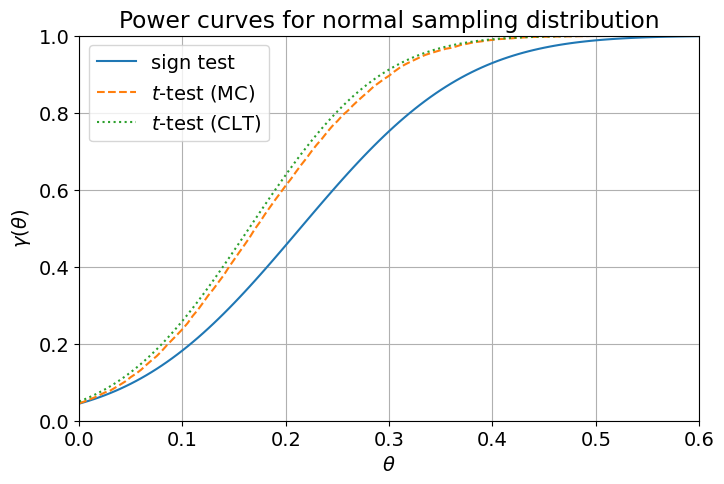

In [11]:
plt.plot(theta_t,gammas_t,ls='-',label='sign test');
plt.plot(theta_t,gammat_t,ls='--',label=r'$t$-test (MC)');
plt.plot(theta_t,gammaC_t,ls=':',label=r'$t$-test (CLT)');
plt.legend(loc='best');
plt.xlabel(r'$\theta$');
plt.ylabel(r'$\gamma(\theta)$');
plt.title('Power curves for normal sampling distribution');
plt.grid(True);
plt.xlim(0,0.6);
plt.ylim(0,1);

Which test is more powerful?

The t-test using the CLT is more powerful.

**(f)** Repeat steps (b)-(e), supposing the sampling distribution is a
    Laplace distribution with location parameter $\theta$ and scale
    parameter $1/\sqrt{2}$, as defined by SciPy's `stats` module (so the
    distribution is defined by
    `stats.laplace(loc=theta_t,scale=np.sqrt(0.5))`). Be sure to update
    any labels and titles appropriately.

In [12]:
mydist = stats.laplace(loc=theta_t,scale=np.sqrt(0.5))

In [13]:
# (b)
ptheta_t = mydist.sf(0)  

In [14]:
# (c)
gammas_t = stats.binom(n,ptheta_t).sf(ncrit+0.5)  # do I use the previous one because we aren't told to repeat (a)

In [15]:
# (d)
np.random.seed(20250211)
N = 10**4
x_Ii = stats.laplace.rvs(loc=0, scale=np.sqrt(0.5), size=(N, n))
xbar_I = np.mean(x_Ii,axis=-1)
s_I = np.std(x_Ii,axis=-1,ddof=1)
t_tI = ( theta_t[:,None] + xbar_I[None,:] ) / (s_I[None,:]/np.sqrt(n))
gammat_t = np.mean((t_tI > tcrit),axis=-1) 

In [16]:
# (d)
gammaC_t = 1 - stats.norm.cdf(  
    stats.norm.isf(0.05) - (theta_t / (1 / np.sqrt(n)))
) 

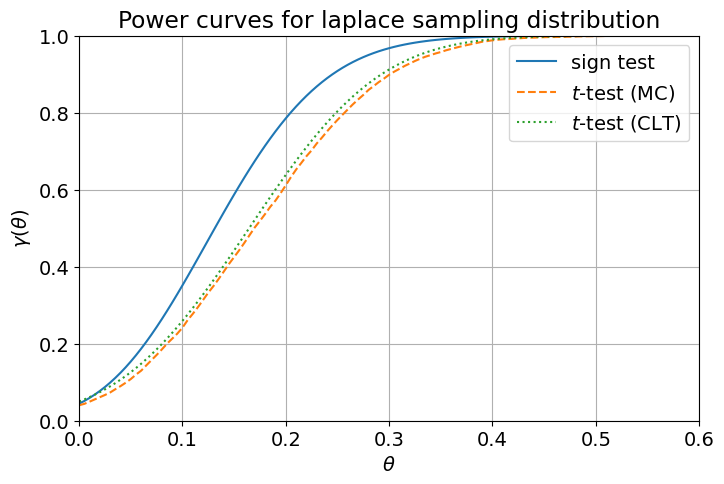

In [17]:
# (e)
plt.plot(theta_t,gammas_t,ls='-',label='sign test');
plt.plot(theta_t,gammat_t,ls='--',label=r'$t$-test (MC)');
plt.plot(theta_t,gammaC_t,ls=':',label=r'$t$-test (CLT)');
plt.legend(loc='best');
plt.xlabel(r'$\theta$');
plt.ylabel(r'$\gamma(\theta)$');
plt.title('Power curves for laplace sampling distribution');
plt.grid(True);
plt.xlim(0,0.6);
plt.ylim(0,1);

Now which test is more powerful?

Now the sign test is more powerful.